<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   EmailText  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Model Accuracy: 0.9691313711414213
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      2388
        spam       1.00      0.79      0.88       398

    accuracy                           0.97      2786
   macro avg       0.98      0.89      0.93      2786
weighted avg       0.97      0.97      0.97      2786

Confusion Matrix:
 [[2387    1]
 [  85  313]]


C:\Users\haric\AppData\Local\Temp\ipykernel_6104\176524586.py:44: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  n = pd.value_counts(data["Label"], sort=True)


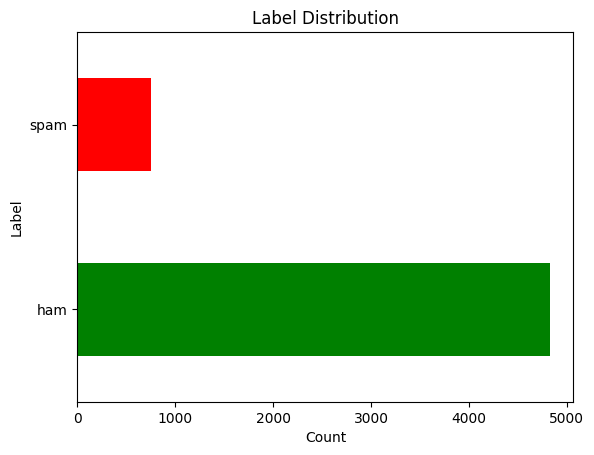

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Load the dataset
data = pd.read_csv(r'spam.csv') 

# Display basic information about the dataset
data.head() 
data.info() 
data.describe() 

# Extract features and labels
X = data['EmailText'].values 
y = data['Label'].values 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) 

# Vectorize the text data
cv = CountVectorizer()   
X_train = cv.fit_transform(X_train) 
X_test = cv.transform(X_test) 

# Train the SVM model
classifier = SVC(kernel='rbf', random_state=10)  # rbf -> Radial Basis Function 
classifier.fit(X_train, y_train) 

# Make predictions
y_pred = classifier.predict(X_test) 

# Compare actual vs predicted labels
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# Print evaluation metrics
print("Model Accuracy:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 

# Visualize label distribution
n = pd.value_counts(data["Label"], sort=True) 
n.plot(kind='barh', color=["green", "red"]) 
plt.title('Label Distribution') 
plt.xlabel('Count') 
plt.ylabel('Label') 
plt.show()


In [1]:
!pip install ibm-watson

  Using cached ibm_watson-8.1.0.tar.gz (400 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached ibm_cloud_sdk_core-3.20.6-py3-none-any.whl.metadata (5.5 kB)
Using cached ibm_cloud_sdk_core-3.20.6-py3-none-any.whl (60 kB)
  Created wheel for ibm-watson: filename=ibm_watson-8.1.0-py3-none-any.whl size=402569 sha256=72aeeaa49049df9961608275154d2b39ad059664f48560de71d7b51e6e86ba07
  Stored in directory: c:\users\haric\appdata\local\pip\cache\wheels\85\70\50\ade53c85b8a04bd309db0972cf097d6898076d30063ed76018
Successfully built ibm-watson


In [2]:
import requests
from requests.auth import HTTPBasicAuth

# Updated URL and API key
url = 'https://api.eu-gb.text-to-speech.watson.cloud.ibm.com/instances/729cbbf2-9862-4623-8ad2-fd6e4b739c75/v1/synthesize'
api_key = 'OZ4EZ3_k6B0IAjGAhfxM8xv4E7aydO1U4w8TnknFFMTD'

# Text to convert to speech
text = "How many times do I have to tell you the same thing? You never listen."

# Headers and data payload
headers = {
    'Content-Type': 'application/json',
    'Accept': 'audio/mp3'  # Request MP3 format
}
data = {
    'text': text,
    'voice': 'en-US_AllisonV3Voice'
}

# Making the request
response = requests.post(
    url,
    headers=headers,
    json=data,
    auth=HTTPBasicAuth('apikey', api_key)
)

# Handling the response
if response.status_code != 200:
    print(f"Error: {response.status_code} - {response.text}")
else:
    with open('output.mp3', 'wb') as audio_file:
        audio_file.write(response.content)
    print("Audio content written to file 'output.mp3'")


Audio content written to file 'output.mp3'


In [4]:
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# Updated API key and URL
apikey = "5YweKca5IpsSAW-uXaw5QD8sl2KZOD5NWzqUueK4lbG0"
url = "https://api.eu-gb.speech-to-text.watson.cloud.ibm.com/instances/e7c5cb9d-cb6f-4305-965d-27a8cd28edf6"

# Authentication
authenticator = IAMAuthenticator(apikey)
speech_to_text = SpeechToTextV1(authenticator=authenticator)
speech_to_text.set_service_url(url)

# Audio file path
audio_file_path = "output.mp3"

# Recognizing speech from audio file
try:
    with open(audio_file_path, 'rb') as audio_file:
        result = speech_to_text.recognize(
            audio=audio_file,
            content_type='audio/mp3',
            model='en-US_BroadbandModel'
        ).get_result()

    # Extracting and printing the transcribed text
    text = result['results'][0]['alternatives'][0]['transcript']
    print(f"Transcribed Text: {text}")

except Exception as e:
    print(f"An error occurred: {e}")


Transcribed Text: how many times do I have to tell you the same thing you never listen 
